## Loan Eligibility Prediction

### 1. Import Required Libraries

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### 2. Load the Dataset

In [187]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


### 3. Dataset Overview

In [188]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [189]:
df.size

55497

In [190]:
df.shape

(4269, 13)

In [191]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [192]:
df.columns = df.columns.str.strip()

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [194]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### 4. Data Cleaning

In [195]:
# check missing values
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [196]:
df.duplicated().sum()

np.int64(0)

## 5. Exploratory Data Analysis (EDA)

### 5.1. Univariate Analysis

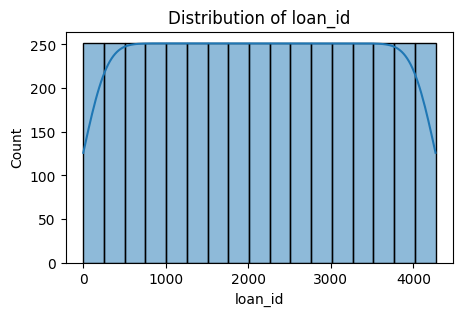

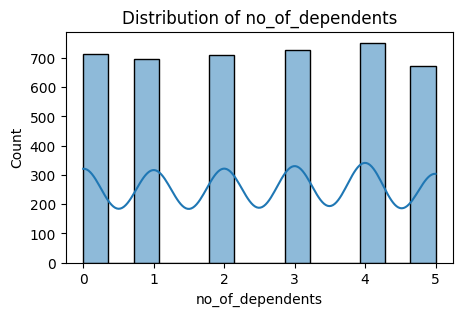

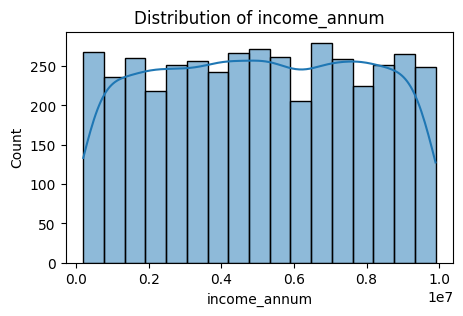

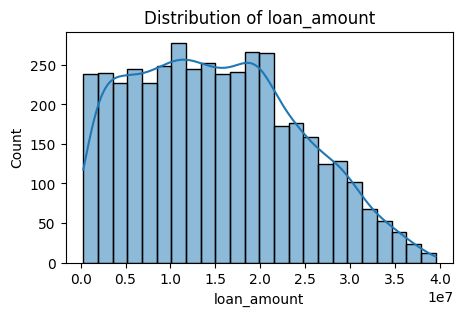

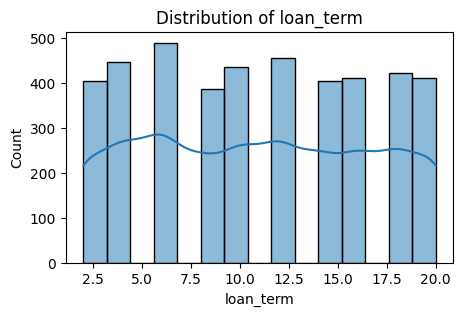

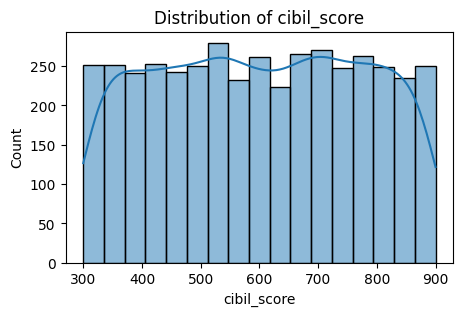

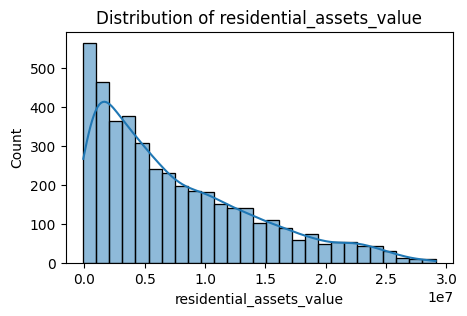

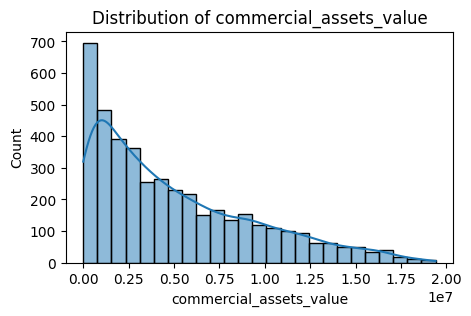

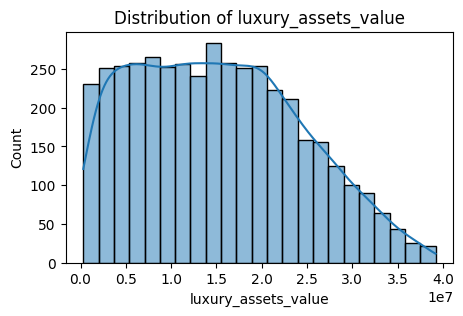

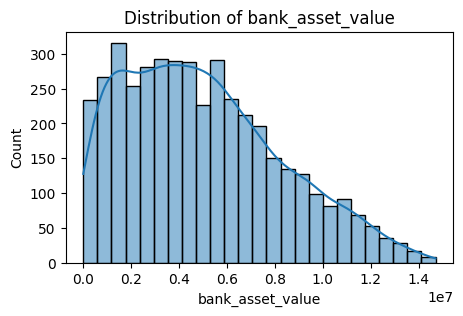

In [197]:
# Numerical Features
num_cols = df.select_dtypes(exclude='object').columns

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [198]:
# Categorical Features
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\n{col}")
    print(df[col].value_counts())


education
education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

self_employed
self_employed
Yes    2150
No     2119
Name: count, dtype: int64

loan_status
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


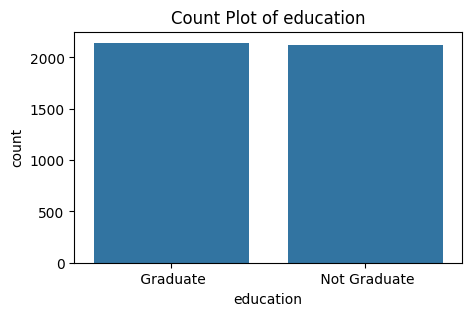

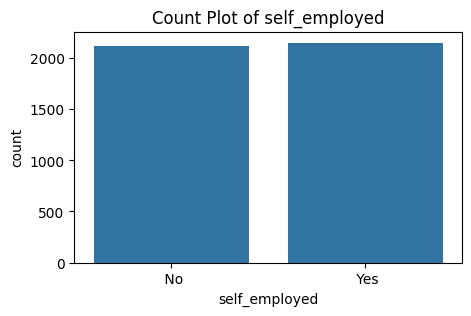

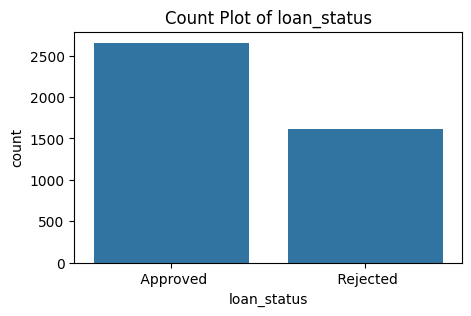

In [199]:
for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.show()


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### 5.2. Bivariate Analysis

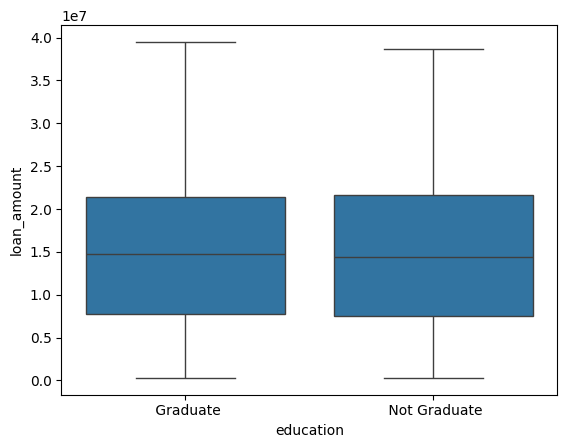

In [201]:
# Education vs Loan Amount
sns.boxplot(x='education', y='loan_amount', data=df)
plt.show()

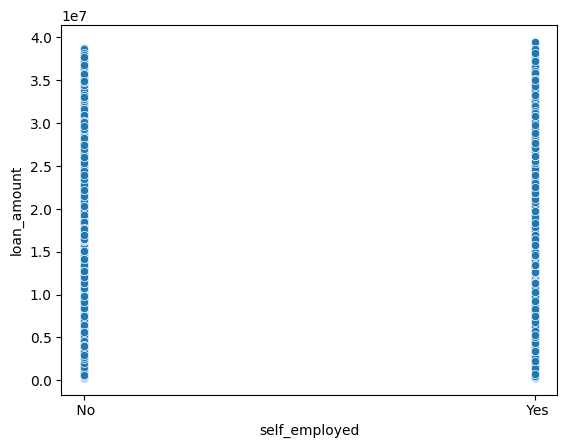

In [202]:
# Self Employed vs Loan Amount
sns.scatterplot(x='self_employed', y='loan_amount', data=df)
plt.show()


<Axes: xlabel='loan_status', ylabel='income_annum'>

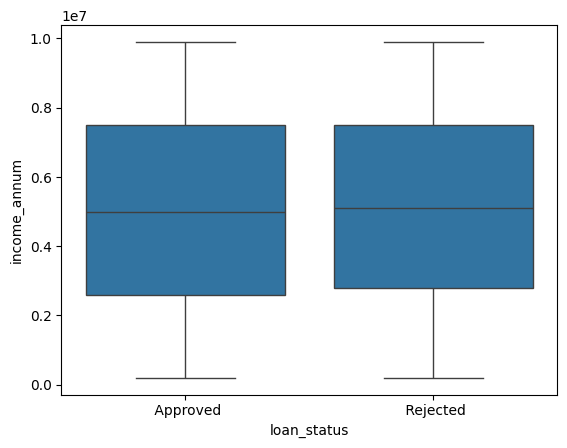

In [203]:
# Income vs Loan Status
sns.boxplot(x='loan_status', y='income_annum', data=df)

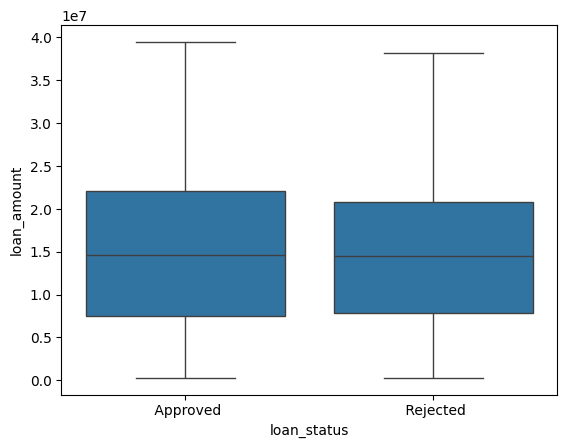

In [204]:
# Loan Amount vs loan status
sns.boxplot(x='loan_status', y='loan_amount', data=df)
plt.show()


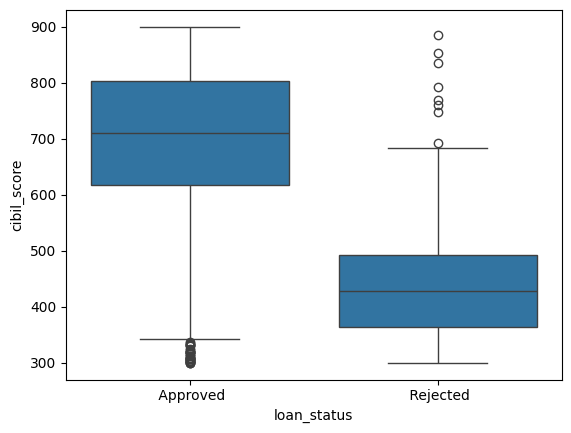

In [205]:
# CIBIL Score vs loan status
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.show()


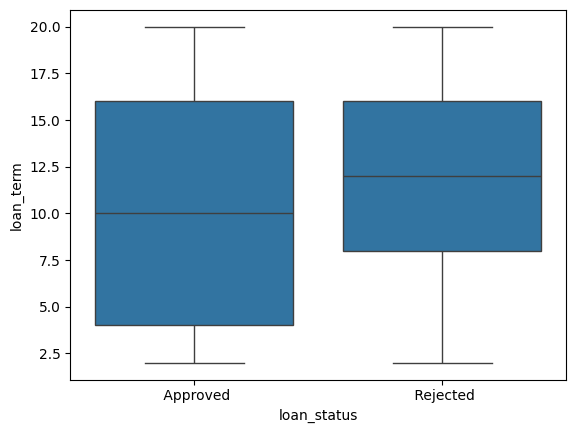

In [206]:
# Loan Status vs loan term
sns.boxplot(x='loan_status', y='loan_term', data=df)
plt.show()

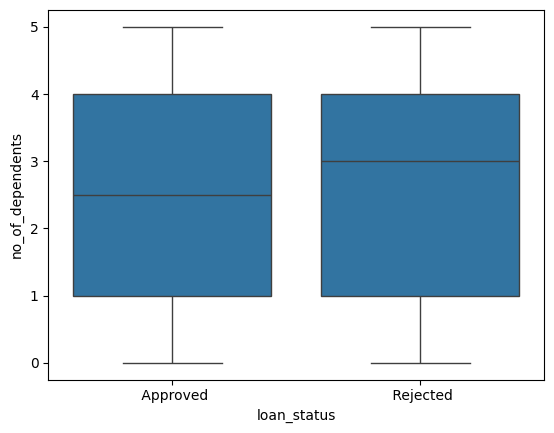

In [207]:
# Dependents vs loan status
sns.boxplot(x='loan_status', y='no_of_dependents', data=df)
plt.show()

In [208]:
# Check Unique Values
df['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

## 6. Encoding

#### 6.1. Label Encoding

In [209]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
li = LabelEncoder()
df['loan_status'] = le.fit_transform(df['loan_status'])
df['education'] = li.fit_transform(df['education'])
df['self_employed'] = li.fit_transform(df['self_employed'])

In [210]:
df["self_employed"].value_counts()

self_employed
1    2150
0    2119
Name: count, dtype: int64

### 7. Correlation Analysis

In [211]:
# Compute correlation matrix
corr = df.corr()
corr


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,1.000000,0.005326,-0.015536,0.001745,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765,-0.017685
no_of_dependents,0.005326,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.018114
education,-0.015536,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424,0.004918
self_employed,0.001745,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,-0.000345
income_annum,0.012592,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.015189
loan_amount,0.008170,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,-0.016150
loan_term,0.009809,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,0.113036
cibil_score,0.016323,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.770518
residential_assets_value,0.020936,0.007376,-0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.014367
commercial_assets_value,0.018595,-0.001531,0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.008246


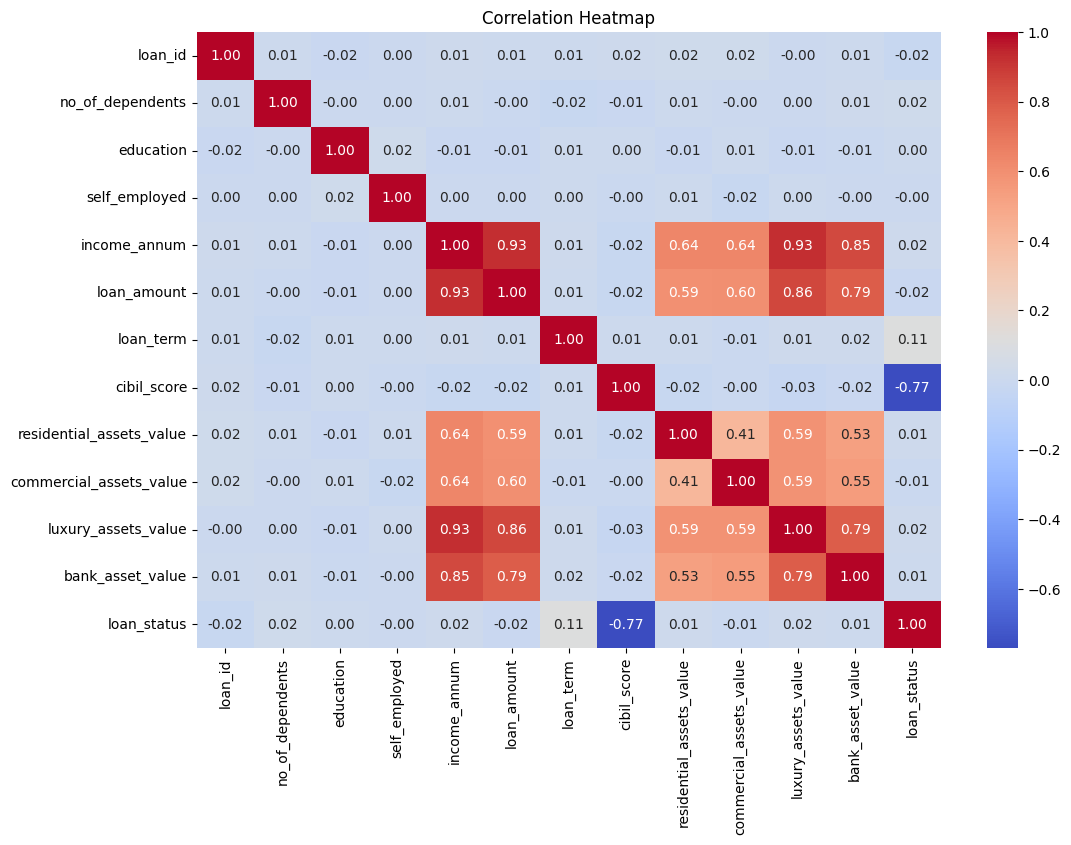

In [212]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   int64
 3   self_employed             4269 non-null   int64
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


### 8. Outlier Detection ( Using Boxplot )

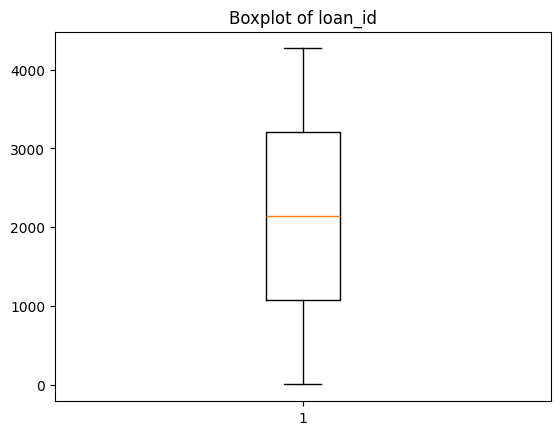

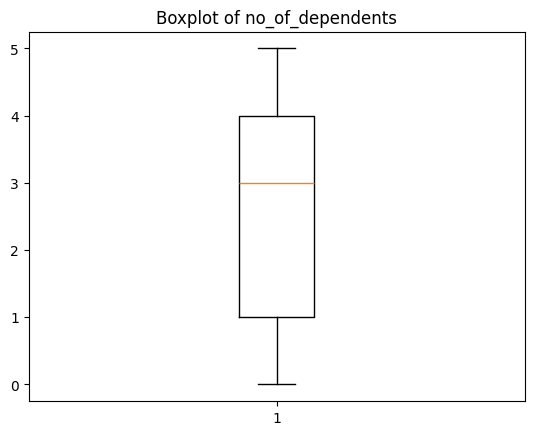

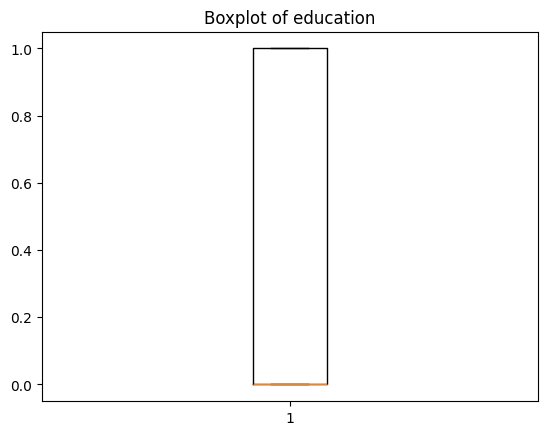

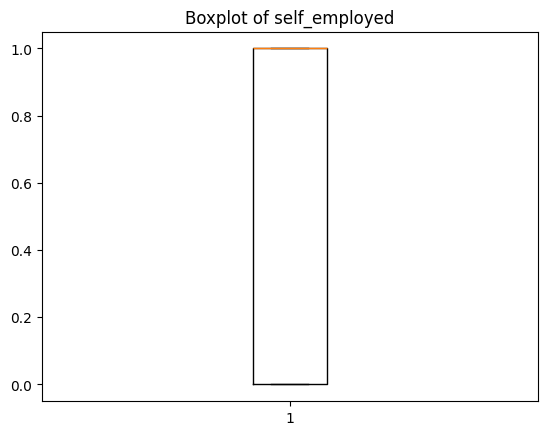

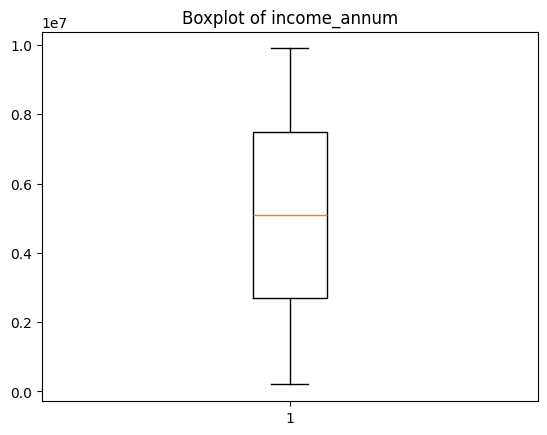

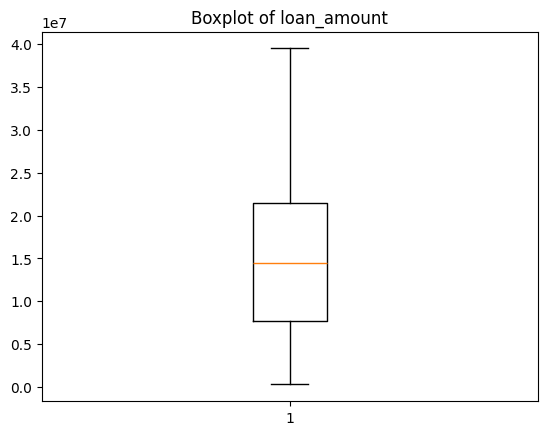

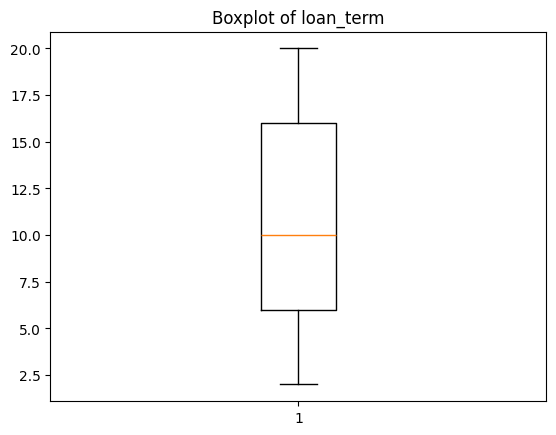

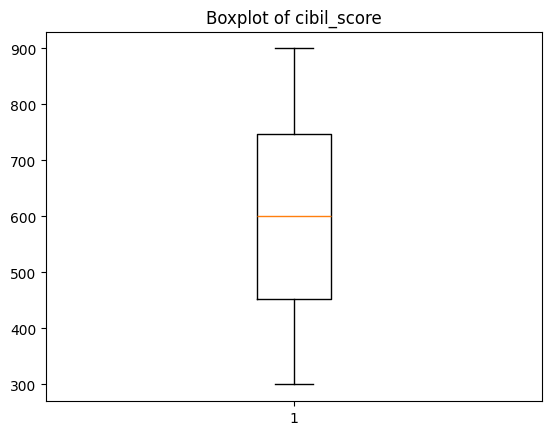

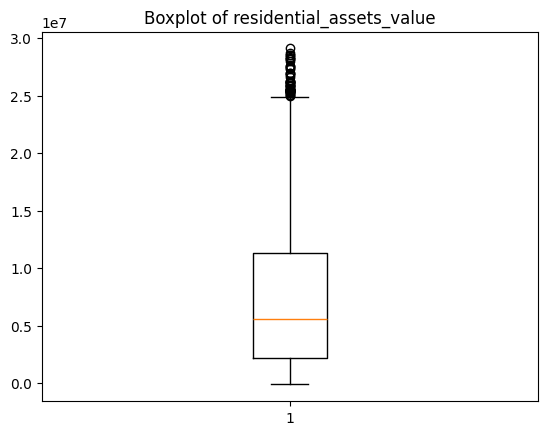

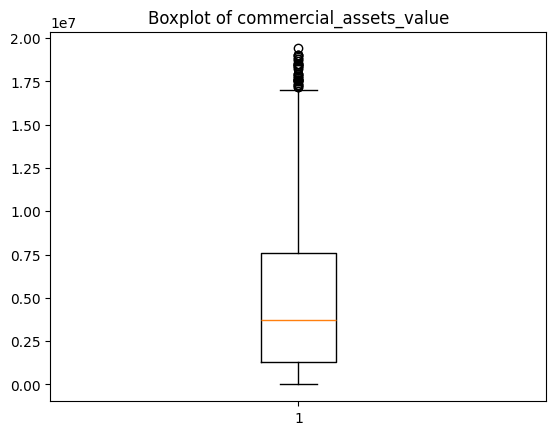

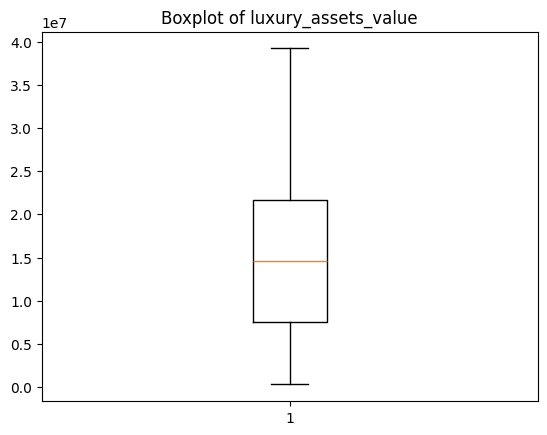

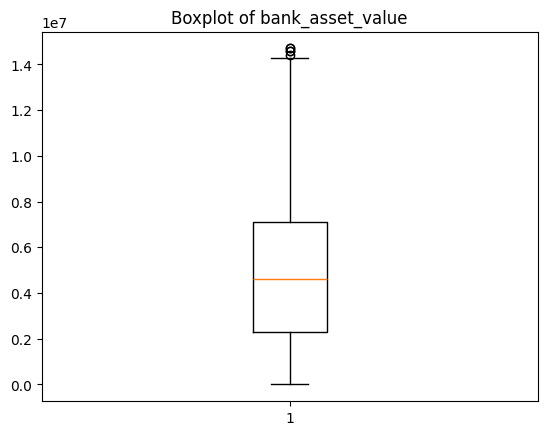

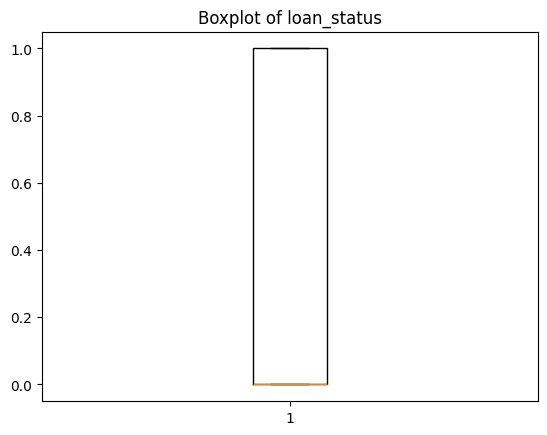

In [214]:
# Boxplot of each feature
for col in df.columns:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   int64
 3   self_employed             4269 non-null   int64
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


In [216]:
# handling outliers using for loop
out=["residential_assets_value","commercial_assets_value","bank_asset_value"]
for col in out:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower_bound, upper_bound)


In [217]:
# drop irreelevant column
df.drop(columns=['loan_id'], inplace=True)

### 9. Feature Selection

In [218]:
# feature and target separation
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [219]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [220]:
X_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1224,0,0,1,9800000,23900000,14,459,1000000,13400000,21100000,7200000
478,3,1,1,3600000,8600000,8,790,5400000,5900000,9800000,5200000
3065,2,1,0,2000000,4000000,14,502,4900000,1500000,5400000,1300000
326,2,1,1,3900000,11300000,12,516,3100000,0,10400000,4600000
2991,3,1,0,2300000,8500000,12,557,3600000,1400000,6200000,1300000
...,...,...,...,...,...,...,...,...,...,...,...
23,0,1,1,500000,1400000,2,551,900000,600000,1100000,300000
233,3,1,1,8800000,34600000,8,386,14800000,16500000,18400000,6000000
3298,2,1,1,6800000,15500000,12,338,9900000,1200000,21800000,8500000
1397,1,1,1,9200000,24500000,4,545,24950000,0,20600000,13300000


In [221]:
X_test

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
2346,3,0,0,8000000,26200000,16,890,15800000,4300000,25000000,4000000
1162,1,0,1,1900000,4200000,4,620,4700000,2800000,7500000,900000
3061,2,1,1,3300000,9600000,18,896,9900000,900000,12100000,4900000
483,3,1,1,2500000,8800000,12,538,4900000,1800000,9100000,3300000
2102,1,1,0,7900000,29300000,2,771,17600000,12800000,20400000,4000000
...,...,...,...,...,...,...,...,...,...,...,...
1040,3,1,1,8000000,28800000,10,576,18800000,7500000,16300000,11900000
3069,5,0,1,8700000,18400000,12,394,18800000,3200000,24600000,12000000
3920,4,0,0,9100000,26600000,2,812,23300000,11900000,33100000,10400000
119,1,1,1,9100000,32900000,2,717,2200000,2000000,23600000,5900000


In [222]:
y_train

1224    1
478     0
3065    1
326     1
2991    0
       ..
23      0
233     1
3298    1
1397    1
3222    1
Name: loan_status, Length: 3415, dtype: int64

In [223]:
y_test

2346    0
1162    0
3061    0
483     1
2102    0
       ..
1040    0
3069    1
3920    0
119     0
1865    1
Name: loan_status, Length: 854, dtype: int64

In [224]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 10. Model Training

### 10.1. Logistic Regression

In [258]:
y.value_counts()

loan_status
0    2656
1    1613
Name: count, dtype: int64

In [259]:
df['loan_status'].value_counts()

loan_status
0    2656
1    1613
Name: count, dtype: int64

In [260]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [261]:
y_pred = lr.predict(X_test)
print("Predicted:", y_pred)
print("Actual:", y_test.values)

Predicted: [0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0
 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0
 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 1 1 0

In [262]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Confusion Matrix:
 [[505  26]
 [ 40 283]]
Accuracy: 0.9227166276346604
Precision: 0.9158576051779935
Recall: 0.8761609907120743
F1 Score: 0.8955696202531646


In [263]:
y_pred_train= lr.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_pred_train))

Accuracy: 0.9150805270863837


In [264]:
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1 Score:", f1_score(y_train, y_pred_train))

Confusion Matrix:
 [[1987  138]
 [ 152 1138]]
Precision: 0.8918495297805643
Recall: 0.8821705426356589
F1 Score: 0.886983632112237


### 10.2. Decision Tree

In [265]:
# Create Model
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [266]:
# train model
dt.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [267]:
y_pred_train= dt.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_pred_train))

Accuracy: 0.9707174231332357


In [268]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = dt.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9742388758782201
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       531
           1       0.94      0.99      0.97       323

    accuracy                           0.97       854
   macro avg       0.97      0.98      0.97       854
weighted avg       0.98      0.97      0.97       854



In [270]:
from sklearn import tree

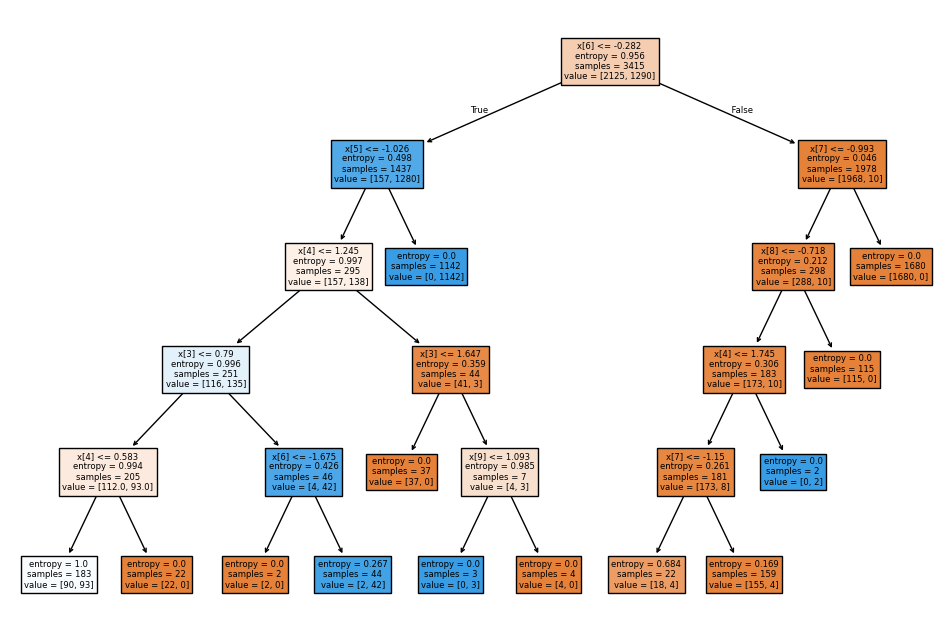

In [271]:
# Draw Tree
plt.figure(figsize=(12,8))
tree.plot_tree(dt, filled=True)
plt.show()

### 10.3. Random Forest

In [272]:
# create and train model
rf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,min_samples_leaf=4)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [273]:
# predict and evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9812646370023419


In [274]:
y_pred_train= rf.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_pred_train))

Accuracy: 0.99502196193265


### 10.4. SVC

In [275]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [276]:
from sklearn.svm import SVC

In [277]:
model = SVC(kernel='rbf', C=10, gamma='scale')
model.fit(X_train, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [278]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9461358313817331


In [279]:
y_pred_train= model.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_pred_train))

Accuracy: 0.9765739385065886


### 10.5. K-Nearest Neighbours(KNN)

In [280]:
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [281]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8969555035128806


In [282]:
y_pred_train= knn.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_pred_train))

Accuracy: 0.9408491947291362


## 11. Best Model Selection

### 11.1. Import Required Libraries

In [283]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### 11.2. Train Multiple Columns

In [284]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', C=10, gamma='scale')
}

accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc


### 11.3. Compare Model Performance

In [285]:
for model, acc in accuracy_results.items():
    print(f"{model} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9227
Decision Tree Accuracy: 0.9742
Random Forest Accuracy: 0.9824
KNN Accuracy: 0.8970
SVM Accuracy: 0.9461


### 11.4. Select Best Model

In [286]:
best_model_name = max(accuracy_results, key=accuracy_results.get)
best_model = models[best_model_name]

print("Best Model:", best_model_name)

Best Model: Random Forest


### 12. Save the Model

In [287]:
from joblib import dump

dump(best_model, "Best_loan_model.joblib")
dump(scaler, "scaler.joblib")

['scaler.joblib']

In [255]:
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17050000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [256]:
y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status, Length: 4269, dtype: int64

In [257]:
#manual prediction

new_data = np.array([[3,	0,	0,	8200000,	30700000,	8,	467,	18200000,	3300000,	23300000,	7900000]])
new_data_scaled = scaler.fit_transform(new_data)
prediction = best_model.predict(new_data_scaled)
print("Predicted Loan Status:", prediction[0])


Predicted Loan Status: 0
